In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv(r"C:\Users\acer\Downloads\crop_production.csv")
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [4]:
df.head()
df.info()
df.describe()
df.shape
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [5]:
df['Production'] = df['Production'].fillna(df['Production'].median())


In [6]:
df.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [7]:
#normlization and standardization
from sklearn.preprocessing import MinMaxScaler, StandardScaler
num_cols = df.select_dtypes(include=['number']).columns
num_cols
print("Numeric columns:",num_cols.tolist())

Numeric columns: ['Crop_Year', 'Area', 'Production']


In [8]:
#Normalization
normalizer = MinMaxScaler()
df[num_cols] = normalizer.fit_transform(df[num_cols])
df[num_cols].head()

,Crop_Year,Area,Production
0,0.166667,1.461475e-04,1.598977e-06
1,0.166667,2.284356e-07,7.994883e-10
2,0.166667,1.188331e-05,2.566358e-07
3,0.166667,2.050792e-05,5.124720e-07
4,0.166667,8.391044e-05,1.319156e-07


In [9]:
#Standardization 
sc = StandardScaler()
df[num_cols] = sc.fit_transform(df[num_cols])
df[num_cols].head()

,Crop_Year,Area,Production
0,-1.139508,-0.212750,-0.033755
1,-1.139508,-0.237530,-0.033873
2,-1.139508,-0.235551,-0.033855
3,-1.139508,-0.234086,-0.033836
4,-1.139508,-0.223319,-0.033864


In [10]:
#LabelEncoder 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Crop_Encoded'] = le.fit_transform(df['Crop'])
print(df[['Crop','Crop_Encoded']].head(5))

                  Crop  Crop_Encoded
0             Arecanut             2
1  Other Kharif pulses            74
2                 Rice            95
3               Banana             7
4            Cashewnut            22


In [11]:
#Hot Encoding 
hot_encoding = pd.get_dummies(df, columns = ['Crop'], dtype=int)
print(hot_encoding)

                         State_Name District_Name  Crop_Year       Season  \
0       Andaman and Nicobar Islands      NICOBARS  -1.139508  Kharif        
1       Andaman and Nicobar Islands      NICOBARS  -1.139508  Kharif        
2       Andaman and Nicobar Islands      NICOBARS  -1.139508  Kharif        
3       Andaman and Nicobar Islands      NICOBARS  -1.139508  Whole Year    
4       Andaman and Nicobar Islands      NICOBARS  -1.139508  Whole Year    
...                             ...           ...        ...          ...   
246086                  West Bengal       PURULIA   1.687545  Summer        
246087                  West Bengal       PURULIA   1.687545  Summer        
246088                  West Bengal       PURULIA   1.687545  Whole Year    
246089                  West Bengal       PURULIA   1.687545  Winter        
246090                  West Bengal       PURULIA   1.687545  Winter        

            Area  Production  Crop_Encoded  Crop_Apple  \
0      -0.212750 

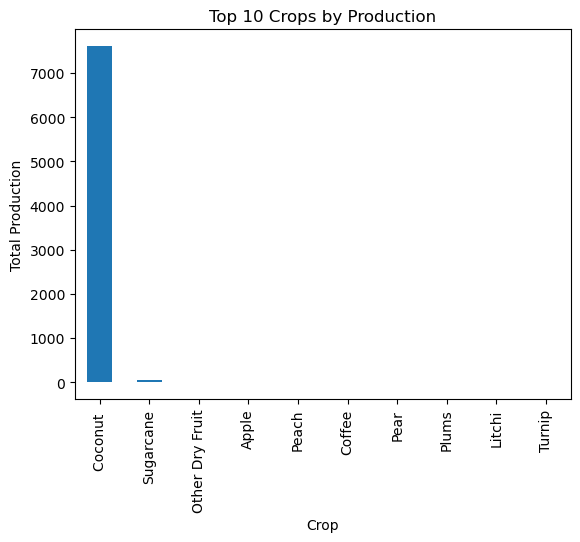

In [12]:
import matplotlib.pyplot as plt

top10 = df.groupby('Crop')['Production'].sum().sort_values(ascending=False).head(10)

plt.figure()
top10.plot(kind='bar')
plt.title('Top 10 Crops by Production')
plt.xlabel('Crop')
plt.ylabel('Total Production')
plt.show()


In [13]:
#Linear Regression 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Crop_enc'] = le.fit_transform(df['Crop'])


In [15]:
X = df[['Crop_enc']]
y = df[['Production']]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
print(X_train.shape)
print(y_train.shape)

(196872, 1)
(196872, 1)


In [18]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
#step 5 predict using the test data 
y_pred = model.predict(X_test)


In [20]:
#6. Evaluate model
print("Model Evaluation:")
print("Intercept:",model.intercept_)
print("Coefficient:",model.coef_[0])
print("MSE:", mean_squared_error(y_test, y_pred))
lr_acc = r2_score(y_test, y_pred)
print("Linear Regression R2 Score:", lr_acc)

Model Evaluation:
Intercept: [0.07823479]
Coefficient: [-0.0011085]
MSE: 0.5560851485857892
Linear Regression R2 Score: 0.00040082136082597586


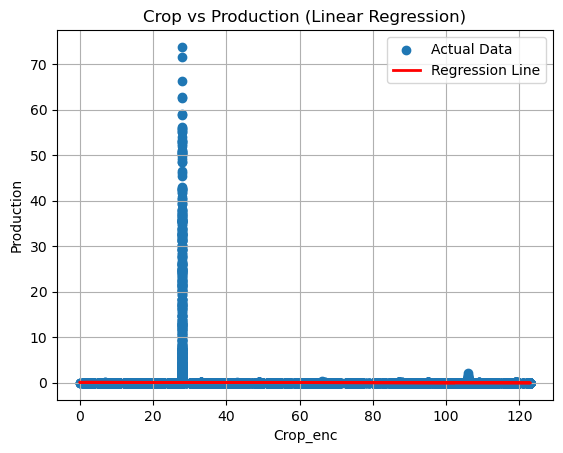

In [21]:
plt.scatter(X, y, label='Actual Data')
plt.plot(X, model.predict(X),color='red', linewidth=2, label='Regression Line')

plt.xlabel("Crop_enc")
plt.ylabel("Production")
plt.title("Crop vs Production (Linear Regression)")
plt.legend()
plt.grid(True)
plt.show()

In [22]:
#KNN
df = df.dropna(subset=['Area', 'Production'])
# Create categories using bins
df['Production_Category'] = pd.cut(df['Production'],bins=3,labels=[0, 1, 2])  # 0=Low, 1=Medium, 2=High)

# Check
df[['Production', 'Production_Category']].head()



,Production,Production_Category
0,-0.033755,0
1,-0.033873,0
2,-0.033855,0
3,-0.033836,0
4,-0.033864,0


In [23]:
X = df[['Area']]        # Feature must be 2D
y = df['Production_Category']   # Target


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
y_pred = knn.predict(X_test)


In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("\n=== KNN Classification Results ===")
knn_acc = accuracy_score(y_test, y_pred)
print("KNN Accuracy:", knn_acc)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred,zero_division=0))



=== KNN Classification Results ===
KNN Accuracy: 0.9995936528576362

Confusion Matrix:
 [[49199     0     0]
 [   19     0     0]
 [    1     0     0]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     49199
           1       0.00      0.00      0.00        19
           2       0.00      0.00      0.00         1

    accuracy                           1.00     49219
   macro avg       0.33      0.33      0.33     49219
weighted avg       1.00      1.00      1.00     49219



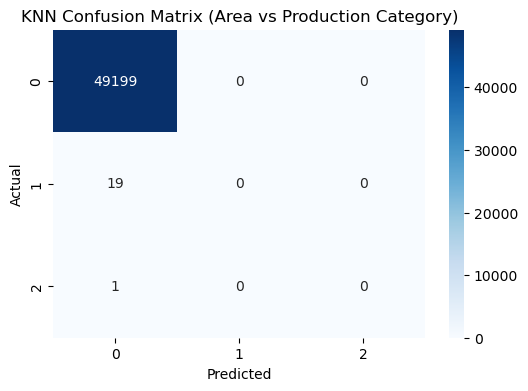

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("KNN Confusion Matrix (Area vs Production Category)")
plt.show()


In [30]:
#decision treeclassifier 
df = df.dropna(subset=['Area', 'Production', 'Crop'])
le = LabelEncoder()
df['Crop_encoded'] = le.fit_transform(df['Crop'])
df['Production_Category'] = pd.cut(df['Production'],bins=3,labels=[0, 1, 2])# 0=Low, 1=Medium, 2=High
df[['Production', 'Production_Category']].head()


,Production,Production_Category
0,-0.033755,0
1,-0.033873,0
2,-0.033855,0
3,-0.033836,0
4,-0.033864,0


In [31]:
X = df[['Area', 'Crop_encoded']]
y = df['Production_Category']


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
dt = DecisionTreeClassifier(criterion='gini',max_depth=5,random_state=42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [34]:
y_pred = dt.predict(X_test)


In [35]:
knn_acc = accuracy_score(y_test, y_pred)
dt_acc = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy:", dt_acc)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Decision Tree Accuracy: 0.9997765090716999

Confusion Matrix:
 [[49195     2     2]
 [    6    12     1]
 [    0     0     1]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     49199
           1       0.86      0.63      0.73        19
           2       0.25      1.00      0.40         1

    accuracy                           1.00     49219
   macro avg       0.70      0.88      0.71     49219
weighted avg       1.00      1.00      1.00     49219



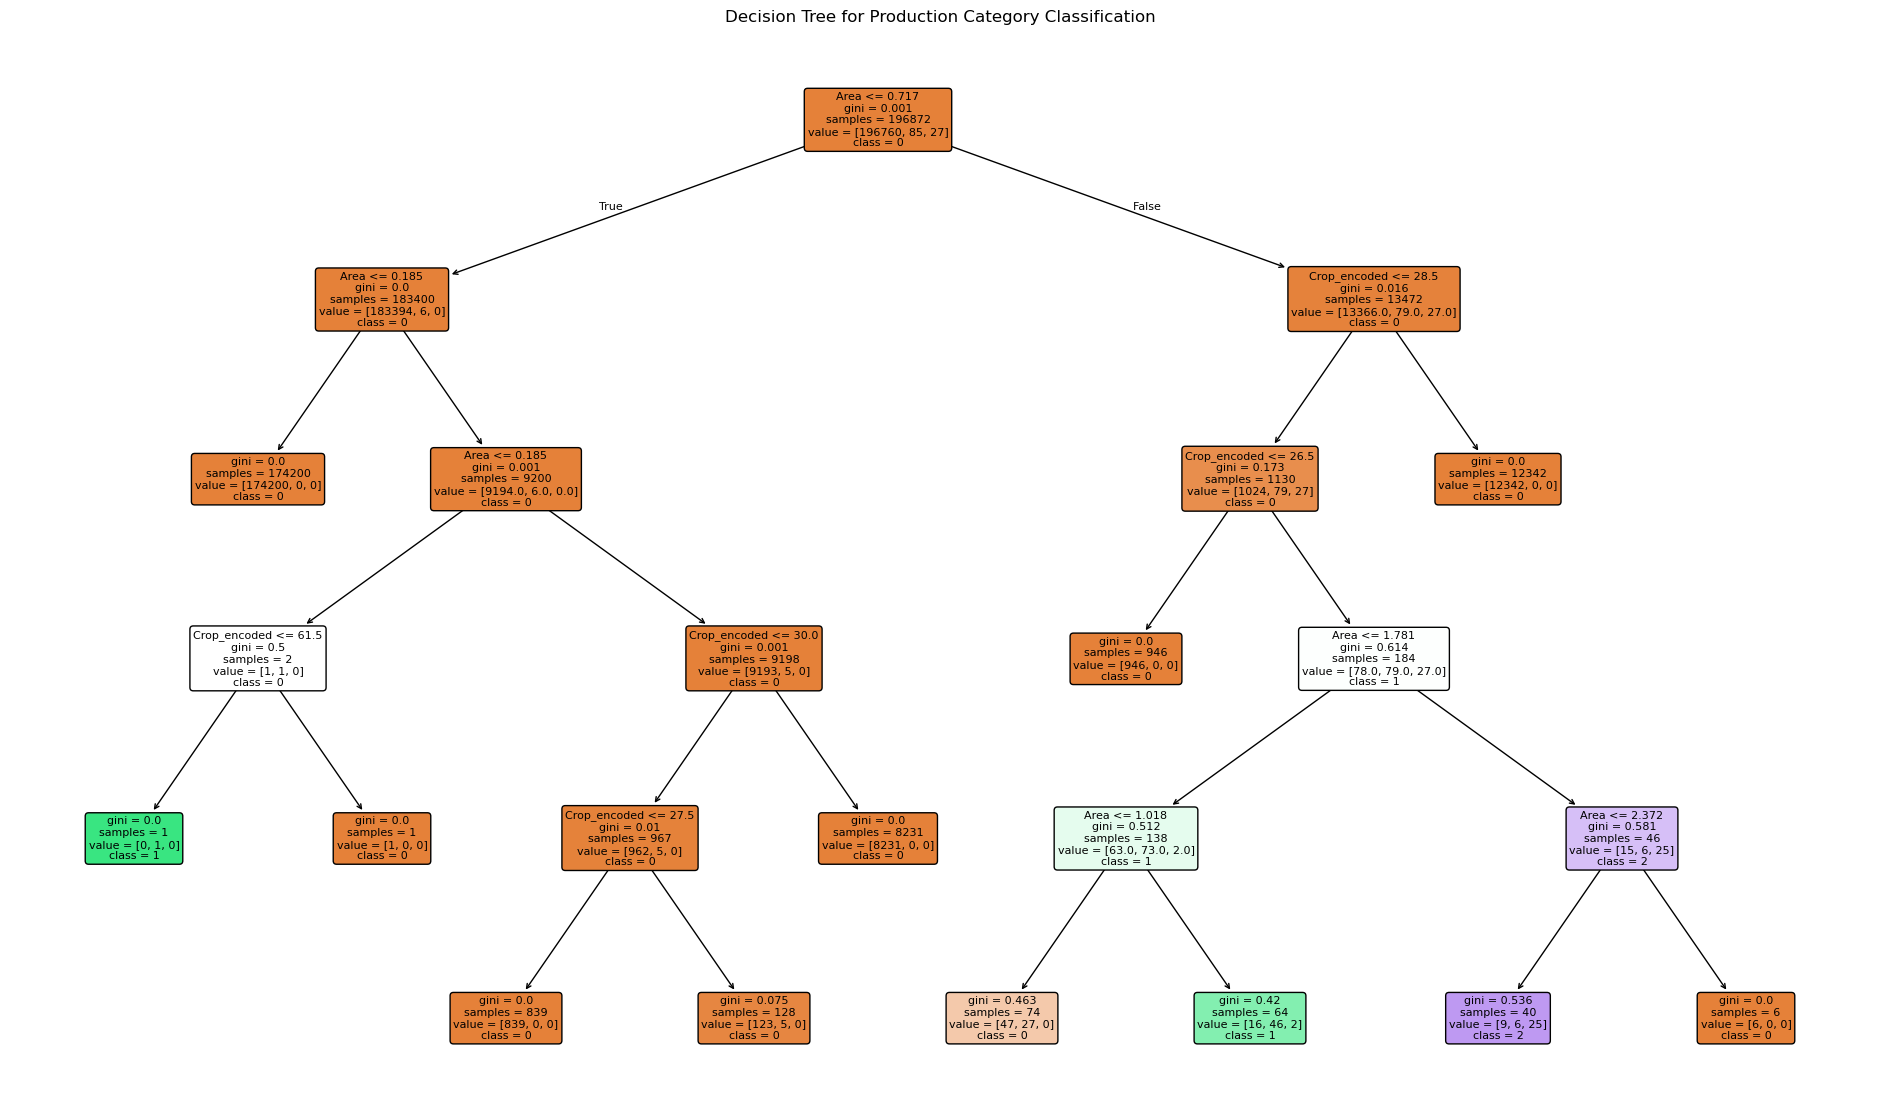

In [36]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 14))

plot_tree(
    dt,
    feature_names=['Area', 'Crop_encoded'],   
    class_names=[str(c) for c in dt.classes_], 
    filled=True,
    rounded=True,
    fontsize=8
)

plt.title("Decision Tree for Production Category Classification")
plt.show()




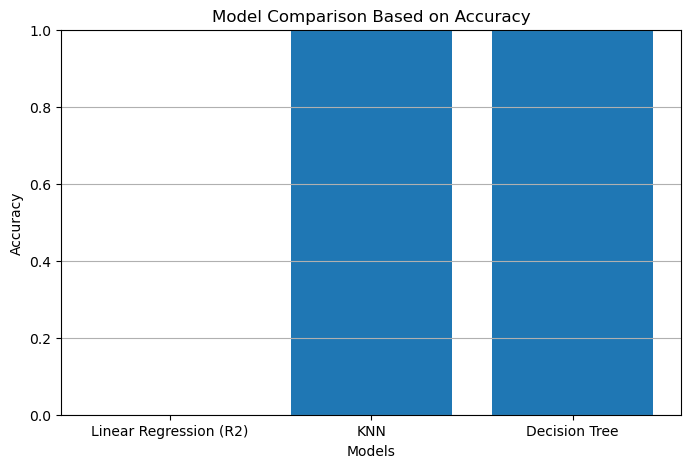

In [37]:
import matplotlib.pyplot as plt

models = ['Linear Regression (R2)', 'KNN', 'Decision Tree']
accuracy = [lr_acc, knn_acc, dt_acc]

plt.figure(figsize=(8,5))
plt.bar(models, accuracy)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison Based on Accuracy')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()
